In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from xgboost import XGBRegressor
import shap


In [15]:
df = pd.read_csv("WildBlueberryPollinationSimulationData.csv", 
                 index_col='Row#')
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [16]:
df.info()

# data description
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 777 no

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


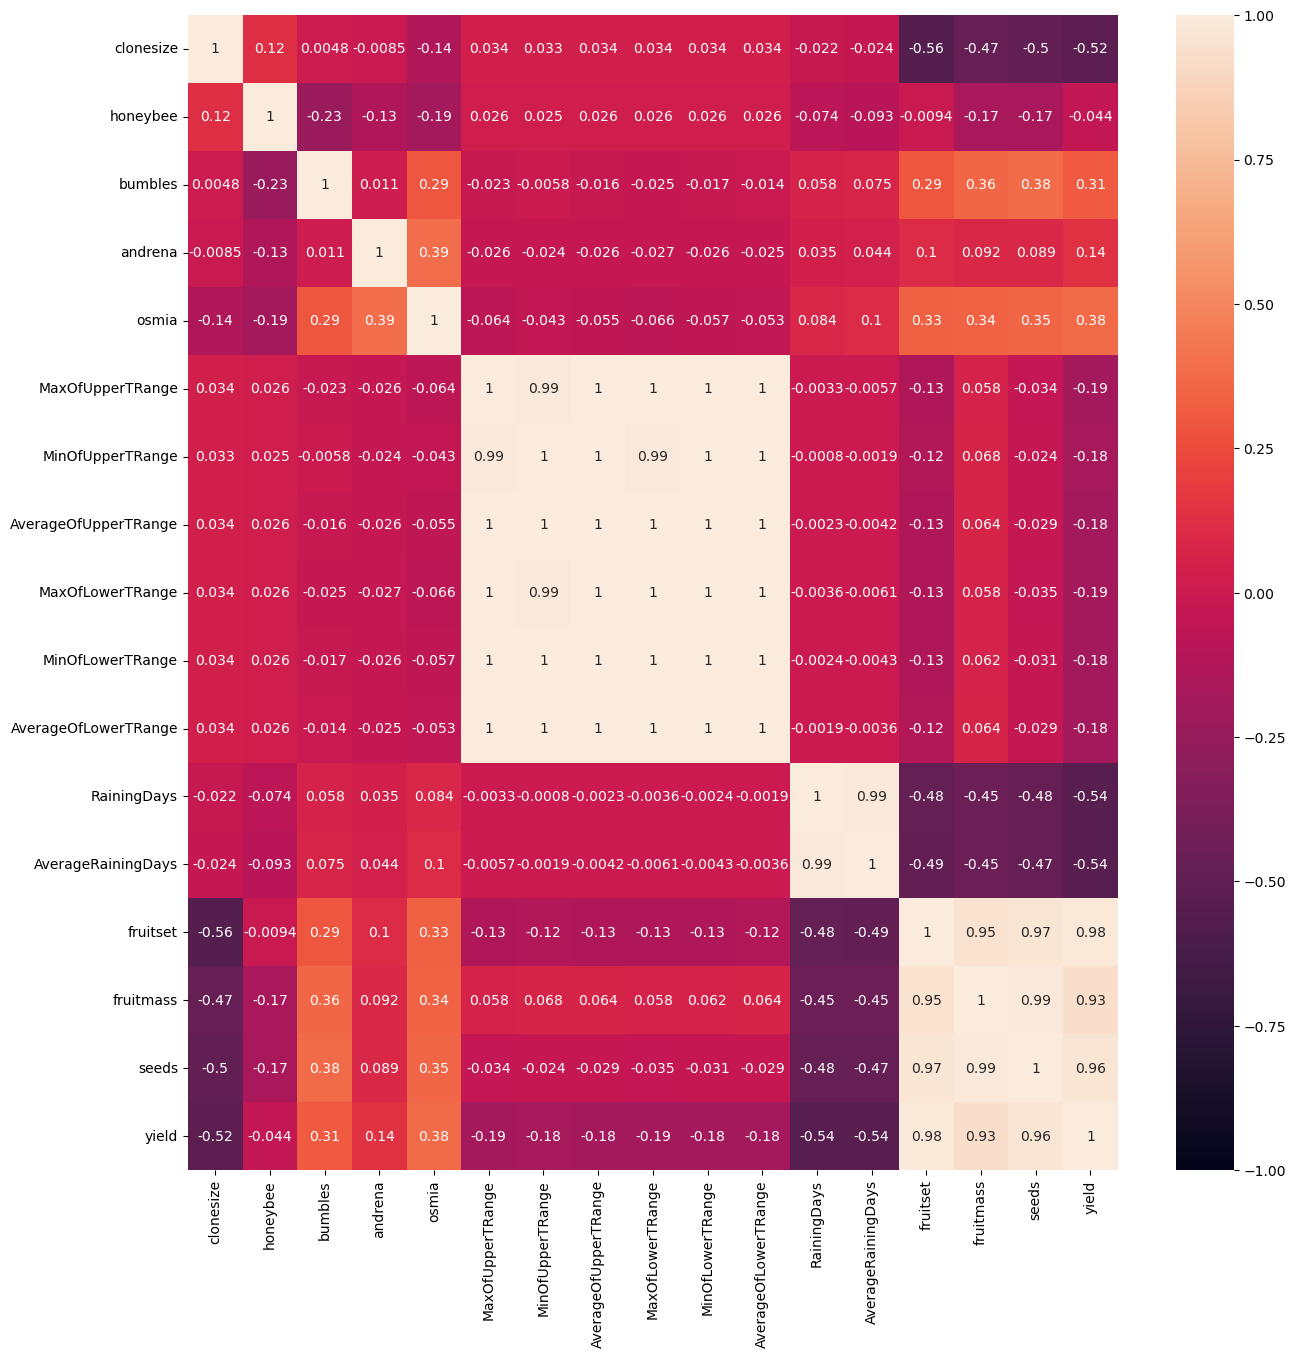

In [17]:
features_df = df.drop('yield', axis=1)
tar = df['yield']

# plot the heatmap from the dataset
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

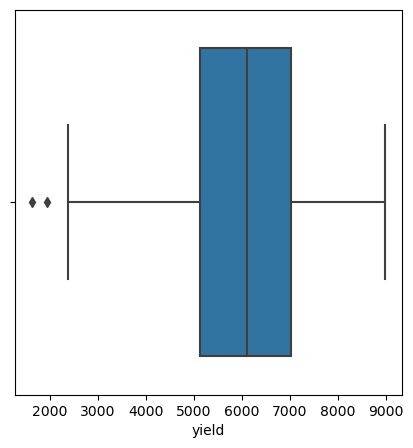

In [18]:
# plot the boxplot using seaborn library of the target variable 'yield'
plt.figure(figsize=(5,5))
sns.boxplot(x='yield', data=df)
plt.show()

In [36]:
sc = StandardScaler()


In [69]:
x=df[['AverageRainingDays','clonesize','AverageOfLowerTRange',
               'AverageOfUpperTRange','honeybee','osmia','bumbles','andrena']]

In [70]:
y=df['yield']

In [71]:
y.value_counts()

yield
3813.165795    1
5439.421503    1
3238.028147    1
5964.791108    1
6526.988187    1
              ..
7570.608619    1
6255.890642    1
5124.854901    1
5151.386473    1
3943.131681    1
Name: count, Length: 777, dtype: int64

In [72]:
x_scaled = sc.fit_transform(x)

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
model_dict = {"abr": AdaBoostRegressor(), 
              "gbr": GradientBoostingRegressor(), 
              "rfr": RandomForestRegressor()
             }

# Cross value scores of the models
for key, val in model_dict.items():
    print(f"cross validation for {key}")
    score = cross_val_score(val, x, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.sum(score)/5
    sqrt_score = np.sqrt(mean_score) 
    print(sqrt_score)

cross validation for abr
750.6412086527951
cross validation for gbr
514.1612542007314
cross validation for rfr
607.5300169825629


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [79]:
y_pred=linear_model.predict(X_test)

In [80]:
result={
    'Actual':y_test,
    'Predicted':y_pred
}

In [81]:
pd.DataFrame(result)

,Actual,Predicted
Row#,,
568,4282.700632,4302.133725
530,6801.492050,6467.035029
610,6279.338501,6341.564207
109,6898.390949,6941.749685
586,7004.015537,6730.085842
...,...,...
79,6030.980735,5616.168837
148,7411.174571,6982.625435
623,4587.385566,4877.542065


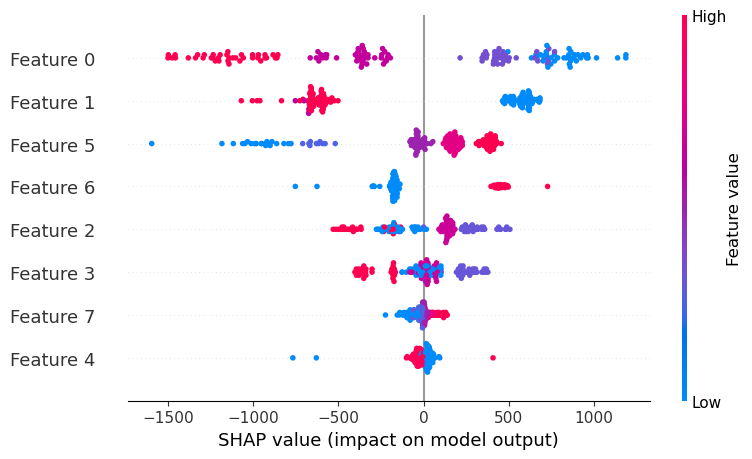

In [82]:
import shap
from sklearn.ensemble import GradientBoostingRegressor

# Assuming bgt is your GradientBoostingRegressor model and X_test is your test data
# Create and fit the model
bgt = GradientBoostingRegressor()
bgt.fit(X_train, y_train)

# Create a SHAP TreeExplainer
shap_tree = shap.TreeExplainer(bgt)

# Calculate SHAP values
shap_values = shap_tree.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


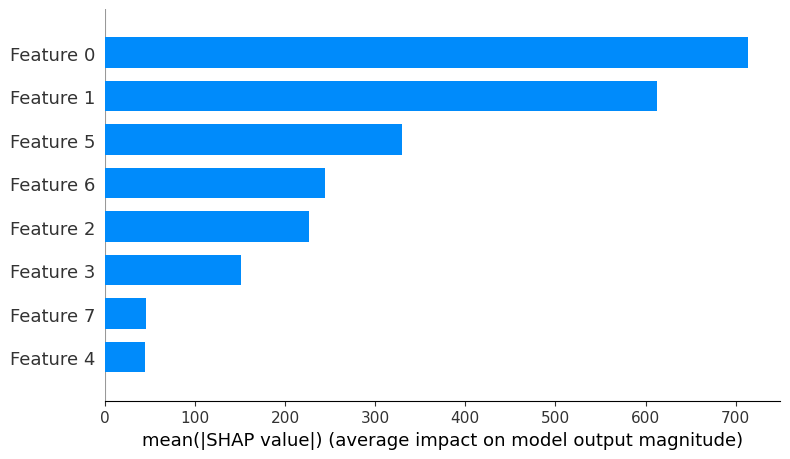

In [83]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [84]:
import pickle
file = open('linear_model.pkl','wb')
pickle.dump(linear_model,file)